# 데이터 불러오기 + 전처리

In [2]:
!sudo apt-get install -y fonts-nanum    # 나눔 폰트 설치
!sudo fc-cache -fv                      # 시스템의 글꼴 정보 캐시를 업데이트
!rm ~/.cache/matplotlib -rf             # matplotlib 글꼴 캐시를 remove

# 이후 런타임 초기화

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,042 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

> ## 전처리

## 1. 패키지, 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install  konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 37.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from konlpy.tag import Okt

import requests
from bs4 import BeautifulSoup

from wordcloud  import WordCloud
from wordcloud  import ImageColorGenerator
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [4]:
text1 = pd.read_excel('/content/drive/MyDrive/OB2조/프로젝트(2)/1. 웹크롤링/크롤링결과+원본신문/경향_크롤링.xlsx')
text2 = pd.read_excel('/content/drive/MyDrive/OB2조/프로젝트(2)/1. 웹크롤링/크롤링결과+원본신문/한겨레_크롤링.xlsx')
text3 = pd.read_excel('/content/drive/MyDrive/OB2조/프로젝트(2)/1. 웹크롤링/크롤링결과+원본신문/한국일보 크롤링결과.xlsx')
text4 = pd.read_excel('/content/drive/MyDrive/OB2조/프로젝트(2)/1. 웹크롤링/크롤링결과+원본신문/조선일보_크롤링.xlsx')
text3=text3[text3['제목'].str.contains('사설|칼럼|메아리|지평성|36.5|기고')]

In [5]:
text1 = text1[~((text1['기사내용'] == '크롤링 실패') | (text1['기사내용'].isnull()))]
text2 = text2[~((text2['기사내용'] == '크롤링 실패') | (text2['기사내용'].isnull()))]
text3 = text3[~((text3['기사내용'] == '크롤링 실패') | (text3['기사내용'].isnull()))]
text4 = text4[~((text4['기사내용'] == '크롤링 실패') | (text4['기사내용'].isnull()))]

In [6]:
opinion1 = text1[text1['URL'].str.contains('opinion', na=False)]
opinion1 = opinion1[['일자','언론사','기사내용']]
opinion1 = opinion1.reset_index(drop=True)

opinion2 = text2[text2['URL'].str.contains('opinion', na=False)]
opinion2 = opinion2[['일자','언론사','기사내용']]
opinion2 = opinion2.reset_index(drop=True)

opinion3 = text3[text3['제목'].str.contains('사설', na=False)]
opinion3 = opinion3[['일자','언론사','기사내용']]
opinion3 = opinion3.reset_index(drop=True)

opinion4 = text4[text4['URL'].str.contains('opinion', na=False)]
opinion4 = opinion4[['일자','언론사','기사내용']]
opinion4 = opinion4.reset_index(drop=True)

In [7]:
opinion = pd.concat([opinion1,opinion2,opinion3,opinion4],axis=0)
opinion['일자'] = pd.to_datetime(opinion['일자'], format='%Y%m%d')
opinion = opinion.reset_index(drop=True)
opinion

,일자,언론사,기사내용
0,2024-04-09,경향신문,거의 대부분의 선거에서 여당과 야당은 정권안정론과 정권심판론을 들고나온다. 지난 총...
1,2024-04-09,경향신문,막말은 사실 아무런 생각 없이 하는 말이 아니다. 상대방을 공격함에 나름 효과가 있...
2,2024-04-09,경향신문,선거판을 지켜보다 비상한 책을 접했다. 동백림 사건의 사형수가 쓴 <정하룡 회고록-...
3,2024-04-09,경향신문,22대 총선 투표가 10일 오전 6시부터 오후 6시까지 전국 1만4259개 투표소에...
4,2024-04-09,경향신문,4·10 총선을 지배하는 정서는 적의와 증오다. 여야는 ‘내가 승리하면 세상을 어떻...
...,...,...,...
4213,2023-05-13,조선일보,김남국 더불어민주당 의원이 국회 상임위와 본회의 도중 수시로 코인을 거래한 정황이 ...
4214,2023-05-13,조선일보,과거 일본 최고 야구 선수였던 재일교포 장훈씨는 “언제까지 일본에 ‘사과하라’ ‘돈...
4215,2023-05-13,조선일보,‘돈 봉투 살포’ 스캔들은 민주당 안에서도 비판이 많지만 유독 송영길 전 대표를 싸...
4216,2023-05-13,조선일보,반복된 코인(가상 화폐) 투자 광풍은 수많은 코인 폐인을 양산했다. 도박판이나 다름...


In [8]:
opinion['언론사'].value_counts()

언론사
조선일보    1297
경향신문    1263
한겨레     1155
한국일보     503
Name: count, dtype: int64

### 기사가 많이 쓰인 날 확인

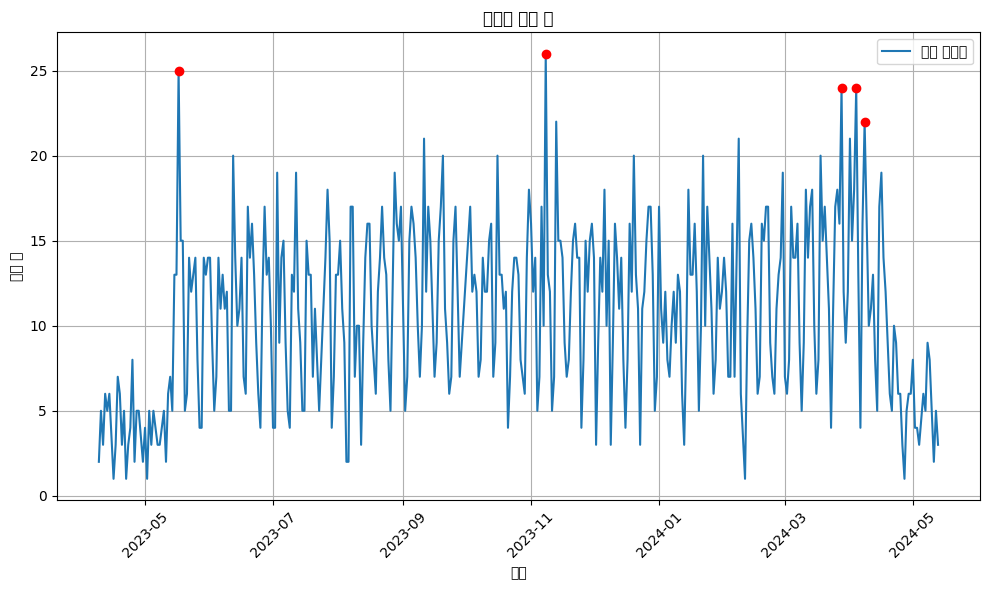

In [9]:
# '일자' 열의 값 빈도 계산
date_counts = opinion['일자'].value_counts().sort_index()

# 인덱스를 datetime 형식으로 변환
date_counts.index = pd.to_datetime(date_counts.index, format='%Y%m%d')

# 상위 5개의 날짜를 구함
top_5_dates = opinion['일자'].value_counts()[:5].index
top_5_dates = pd.to_datetime(top_5_dates, format='%Y%m%d')

# 꺾은선 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.plot(date_counts.index, date_counts.values, label='전체 데이터')

# 상위 5개의 날짜에 해당하는 점을 빨간색으로 표시
for date in top_5_dates:
    if date in date_counts.index:
        plt.plot(date, date_counts[date], 'ro')

plt.title('일자별 기사 수')
plt.xlabel('일자')
plt.ylabel('기사 수')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [10]:
top_5_dates

DatetimeIndex(['2023-11-08', '2023-05-17', '2024-04-04', '2024-03-28',
               '2024-04-08'],
              dtype='datetime64[ns]', name='일자', freq=None)

## 2. 데이터 클리닝

### (1) 텍스트 대체

In [11]:
def preprocess_text(text):
    text = text.replace('윤 대통령', '대통령')
    text = text.replace('김 여사', '김건희')
    text = text.replace('더불어 민주당', '더불어민주당')
    text = text.replace('국민의 힘', '국민의힘')
    text = text.replace('국힘', '국민의힘')
    text = text.replace('조국 혁신당', '조국혁신당')
    text = text.replace('개혁 신당', '개혁신당')
    text = text.replace('이 대표', '이재명')
    text = text.replace('R&D', '연구개발')
    text = text.replace('윤 정부', '윤정부')
    text = text.replace('더민주', '더불어민주당')
    text = text.replace('전 대표', '전대표')

    return text

In [12]:
# 전처리 함수 적용
opinion['기사내용_clean'] = opinion['기사내용'].apply(preprocess_text)

### (2) 이메일, url, 바이라인 제거

In [13]:
import re, unicodedata

def clean_byline(text):
    # byline
    pattern_email = re.compile(r'[-_0-9a-z]+@[-_0-9a-z]+(?:\.[0-9a-z]+)+', flags=re.IGNORECASE)
    pattern_url = re.compile(r'(?:https?:\/\/)?[-_0-9a-z]+(?:\.[-_0-9a-z]+)+', flags=re.IGNORECASE)
    pattern_others = re.compile(r'\.([^\.]*(?:기자|특파원|교수|작가|대표|논설|고문|주필|부문장|팀장|장관|원장|연구원|이사장|위원|실장|차장|부장|에세이|화백|사설|소장|단장|과장|기획자|큐레이터|저작권|평론가|©|©|ⓒ|\@|\/|=|▶|무단|전재|재배포|금지|\[|\]|\(\))[^\.]*)$')
    result = pattern_email.sub('', text)
    result = pattern_url.sub('', result)
    result = pattern_others.sub('.', result)

    # 본문 시작 전 꺽쇠로 쌓인 바이라인 제거
    pattern_bracket = re.compile(r'^((?:\[.+\])|(?:【.+】)|(?:<.+>)|(?:◆.+◆)\s)')
    result = pattern_bracket.sub('', result).strip()

    return result

opinion['기사내용_clean'] = opinion.기사내용_clean.map(clean_byline)

### (2) 한글 알파벳 숫자만 저장

In [14]:
def text_filter(text):
    import re
    from string import whitespace, punctuation
    punct_except_percent = ''.join([chr for chr in punctuation if chr != '%'])
    whitespace_convert_pattern = re.compile(f'[{whitespace}{punct_except_percent}]+')
    exclude_pattern = re.compile(r'[^\% 0-9a-zA-Zㄱ-ㅣ가-힣]+')

    result = whitespace_convert_pattern.sub(' ', text)
    result = exclude_pattern.sub(' ', result).strip()
    result = whitespace_convert_pattern.sub(' ', result)
    return result

opinion['기사내용_clean'] = opinion.기사내용_clean.map(text_filter)

In [15]:
opinion

,일자,언론사,기사내용,기사내용_clean
0,2024-04-09,경향신문,거의 대부분의 선거에서 여당과 야당은 정권안정론과 정권심판론을 들고나온다. 지난 총...,거의 대부분의 선거에서 여당과 야당은 정권안정론과 정권심판론을 들고나온다 지난 총선...
1,2024-04-09,경향신문,막말은 사실 아무런 생각 없이 하는 말이 아니다. 상대방을 공격함에 나름 효과가 있...,막말은 사실 아무런 생각 없이 하는 말이 아니다 상대방을 공격함에 나름 효과가 있다...
2,2024-04-09,경향신문,선거판을 지켜보다 비상한 책을 접했다. 동백림 사건의 사형수가 쓴 <정하룡 회고록-...,선거판을 지켜보다 비상한 책을 접했다 동백림 사건의 사형수가 쓴 정하룡 회고록 나의...
3,2024-04-09,경향신문,22대 총선 투표가 10일 오전 6시부터 오후 6시까지 전국 1만4259개 투표소에...,22대 총선 투표가 10일 오전 6시부터 오후 6시까지 전국 1만4259개 투표소에...
4,2024-04-09,경향신문,4·10 총선을 지배하는 정서는 적의와 증오다. 여야는 ‘내가 승리하면 세상을 어떻...,4 10 총선을 지배하는 정서는 적의와 증오다 여야는 내가 승리하면 세상을 어떻게 ...
...,...,...,...,...
4213,2023-05-13,조선일보,김남국 더불어민주당 의원이 국회 상임위와 본회의 도중 수시로 코인을 거래한 정황이 ...,김남국 더불어민주당 의원이 국회 상임위와 본회의 도중 수시로 코인을 거래한 정황이 ...
4214,2023-05-13,조선일보,과거 일본 최고 야구 선수였던 재일교포 장훈씨는 “언제까지 일본에 ‘사과하라’ ‘돈...,과거 일본 최고 야구 선수였던 재일교포 장훈씨는 언제까지 일본에 사과하라 돈 내라 ...
4215,2023-05-13,조선일보,‘돈 봉투 살포’ 스캔들은 민주당 안에서도 비판이 많지만 유독 송영길 전 대표를 싸...,돈 봉투 살포 스캔들은 민주당 안에서도 비판이 많지만 유독 송영길 전대표를 싸고 돈...
4216,2023-05-13,조선일보,반복된 코인(가상 화폐) 투자 광풍은 수많은 코인 폐인을 양산했다. 도박판이나 다름...,반복된 코인 가상 화폐 투자 광풍은 수많은 코인 폐인을 양산했다 도박판이나 다름없는...


## 3. 품사 태깅 및 불용어 제거

### (1) 불용어 리스트

In [16]:
# 불용어 리스트
with open('/content/drive/MyDrive/OB2조/프로젝트(2)/stopword.txt', 'r', encoding='utf-8') as file:
    stop_words = file.readlines()
stop_words = [word.strip() for word in stop_words]
stop_words = stop_words + ['수','말','전']

### (2) 사용자 지정 사전

In [17]:
!pip3 install konlpy
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2024-05-24 10:23:07--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.13.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.13.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2024-05-24 10:23:07--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7574f8bc59e69e7fa33caeb78c.dl.dropboxusercontent.com/cd/0/get/CTd1kswamTYnU3GOlYYZ9Q-fYRVqfxmOIdE23F37K9Wv7C_ygZtXpjXg30EhUezq7F0guilVFMsBgrmI0ejv9-sWmNpQO-8WIROsEcYN-BJPk91InDUa_7-sYpPp4uS5EWEWoJofXPn9lLbSN8KoxJMN/file?dl=1# [following]
--2024-05-24 10:23:08--  https://uc7574f8bc59e69e7fa33caeb78c.dl.dropboxusercontent.com/cd/0/get/CTd1kswamTYnU3GOlYYZ9Q-fYRVqfxmOIdE23F37K9Wv7C_ygZtXp

In [18]:
import os

os.chdir('/usr/local/lib/python3.10/dist-packages/konlpy/java')
os.getcwd()

!jar xvf open-korean-text-2.1.0.jar


# data 확인
with open(f"/usr/local/lib/python3.10/dist-packages/konlpy/java/org/openkoreantext/processor/util/noun/names.txt") as f:
    data = f.read()

print(data)

  created: META-INF/
 inflated: META-INF/MANIFEST.MF
  created: org/
  created: org/openkoreantext/
  created: org/openkoreantext/processor/
  created: org/openkoreantext/processor/normalizer/
  created: org/openkoreantext/processor/phrase_extractor/
  created: org/openkoreantext/processor/qa/
  created: org/openkoreantext/processor/stemmer/
  created: org/openkoreantext/processor/tokenizer/
  created: org/openkoreantext/processor/tools/
  created: org/openkoreantext/processor/util/
  created: org/openkoreantext/processor/util/adjective/
  created: org/openkoreantext/processor/util/adverb/
  created: org/openkoreantext/processor/util/auxiliary/
  created: org/openkoreantext/processor/util/freq/
  created: org/openkoreantext/processor/util/josa/
  created: org/openkoreantext/processor/util/noun/
  created: org/openkoreantext/processor/util/substantives/
  created: org/openkoreantext/processor/util/typos/
  created: org/openkoreantext/processor/util/verb/
 inflated: org/openkoreantext/pr

In [19]:
# 새 단어 추가
data += '조국혁신당\n개혁신당\n국민의힘\n심판론\n안정론\n연구개발\n윤정부\n더불어민주당\n전대표\n'

# 사전 저장
with open("/usr/local/lib/python3.10/dist-packages/konlpy/java/org/openkoreantext/processor/util/noun/names.txt", 'w') as f:
    f.write(data)

print(data)

가몽
가온
갓세븐
강새이
게임닉가
관우
귀여미
규
김유이
김준면
까까런
노컷
누너예
니노
다마고치
다이무스
대학생
데이브
도요토미
동운
동이
두주니
디시인사이드
디오
라몹
라스
라옵
멍구
메이든
명덕
명량
문민정부
미네
방엘리
병헌
붓다
비정상회담
빼빼로
삼풍
샤인온미
성식
성열
세라문
세라복
세종대왕
손권
손책
쇼미더머니
쇼챔
순규
스라소니
신동아
신쓰패밀리
신아라
아베
안상홍
안홍준
여누
여랑
여포
연합
오꾸닭
요섭
웃찾사
원식
유병언
유비
유이
윤기형
이나단
이명박
이완용
임창용
자괴
자니윤
자대련
자유
재중이
전교조
정윤회
제갈량
조자룡
조조
준면
지오디
지존파
진영오
차작가
차트
창섭
챠트
첸
코르사주
하무열
하용파쿠
혁재
현이
현태
혜미
조국혁신당
개혁신당
국민의힘
심판론
안정론
연구개발
윤정부
더불어민주당
전대표



In [20]:
# 재압축
!jar cvf open-korean-text-2.1.0.jar org
!rm org

added manifest
adding: org/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/stemmer/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/stemmer/KoreanStemmer$.class(in = 7044) (out= 2892)(deflated 58%)
adding: org/openkoreantext/processor/stemmer/KoreanStemmer.class(in = 1439) (out= 972)(deflated 32%)
adding: org/openkoreantext/processor/OpenKoreanTextProcessor.class(in = 4428) (out= 1997)(deflated 54%)
adding: org/openkoreantext/processor/KoreanPosJava.class(in = 2457) (out= 1241)(deflated 49%)
adding: org/openkoreantext/processor/normalizer/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/normalizer/KoreanNormalizer$Segment$.class(in = 2577) (out= 989)(deflated 61%)
adding: org/openkoreantext/processor/normalizer/KoreanNormalizer$Segment.class(in = 3470) (out= 1422)(deflated 59%)
adding: org/openkoreantext/processor/

### (3) 적용

In [21]:
# 형태소 분석기 생성
from konlpy.tag import Okt
okt = Okt()

# 기사내용_clean 열의 각 텍스트에 대해 형태소 태깅 수행
article_list = opinion['기사내용_clean']
tagged_articles = []

for article in article_list:
    tagged = okt.nouns(article)

    # 불용어 제거
    filtered_tagged = [word for word in tagged if word not in stop_words]
    tagged_articles.append(filtered_tagged)

# 결과를 데이터프레임에 추가
opinion['기사내용_tagged'] = tagged_articles

# 데이터 분석 부분

## 연관단어 분석

In [28]:
from collections import Counter
import math
import nltk

# NLTK에서 품사 태깅을 위해 필요한 준비 작업
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# PMI 계산 함수 정의
def calculate_pmi(word, word_freq_with_context, word_freq_all, total_words, total_words_with_context):
    p_word_and_context = word_freq_with_context[word] / total_words
    p_word = word_freq_all[word] / total_words
    p_context = total_words_with_context / total_words

    if p_word == 0 or p_context == 0:
        return 0
    pmi = math.log2(p_word_and_context / (p_word * p_context))
    return pmi

def get_pmi_scores(filtered_opinion, target_word):
    # 모든 단어 리스트 생성
    all_words = [word for sublist in filtered_opinion['기사내용_tagged'] for word in sublist]

    # 모든 단어의 빈도 계산
    word_freq_all = Counter(all_words)

    # 대상 단어가 포함된 문장들 필터링
    sentences_with_target = [sentence for sentence in filtered_opinion['기사내용_tagged'] if target_word in sentence]

    all_words_with_target = [word for sentence in sentences_with_target for word in sentence]
    word_freq_with_target = Counter(all_words_with_target)

    # 전체 단어 수
    total_words = len(all_words)
    total_words_with_target = len(all_words_with_target)

    pmi_scores = {}
    for word in word_freq_with_target:
        if word != target_word and word_freq_with_target[word] >= 5:  # 충분한 빈도로 등장한 단어만 고려하고 target_word 제외
            pmi = calculate_pmi(word, word_freq_with_target, word_freq_all, total_words, total_words_with_target)
            pmi_scores[word] = pmi

    return pmi_scores

# 특정 조건에 따라 의견 필터링 및 PMI 계산
def filter_and_calculate_pmi(opinion, media_list, start_date, end_date, target_word):
    filtered_opinion = opinion[(opinion['언론사'].isin(media_list)) &
                               (opinion['일자'] >= start_date) &
                               (opinion['일자'] <= end_date)]
    pmi_scores = get_pmi_scores(filtered_opinion, target_word)
    return pmi_scores


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [45]:

# 보수 언론에 대한 PMI 계산
conservative_pmi_scores = filter_and_calculate_pmi(opinion, ['한국일보', '조선일보'], '20240301', '20240409', '민주당')

# 진보 언론에 대한 PMI 계산
progressive_pmi_scores = filter_and_calculate_pmi(opinion, ['한겨레', '경향신문'], '20240301', '20240409', '민주당')

# 각 PMI 점수가 높은 상위 20개 단어 출력
conservative_top_10 = sorted(conservative_pmi_scores.items(), key=lambda x: x[1], reverse=True)[:30]
progressive_top_10 = sorted(progressive_pmi_scores.items(), key=lambda x: x[1], reverse=True)[:30]

print("보수 언론 상위 30개 연관 단어 (PMI):", conservative_top_10)
print("진보 언론 상위 30개 연관 단어 (PMI):", progressive_top_10)

보수 언론 상위 30개 연관 단어 (PMI): [('냄비', 0.9153002597060352), ('이대', 0.9153002597060352), ('장교', 0.9153002597060352), ('상납', 0.9153002597060352), ('개표', 0.9153002597060352), ('보직', 0.9153002597060352), ('용산', 0.9153002597060352), ('대권', 0.9153002597060352), ('통합진보당', 0.9153002597060352), ('경북', 0.9153002597060352), ('무소속', 0.9153002597060352), ('사정', 0.9153002597060352), ('성범죄', 0.9153002597060352), ('강북', 0.9153002597060352), ('룰', 0.9153002597060352), ('차점', 0.9153002597060352), ('이력', 0.9153002597060352), ('주류', 0.9153002597060352), ('일제강점기', 0.9153002597060352), ('앞뒤', 0.9153002597060352), ('컷오프', 0.9153002597060352), ('보조금', 0.9153002597060352), ('겨레', 0.9153002597060352), ('중진', 0.9153002597060352), ('김혜경', 0.9153002597060352), ('친윤', 0.9153002597060352), ('총', 0.9153002597060352), ('영어', 0.9153002597060352), ('클럽', 0.9153002597060352), ('선생', 0.9153002597060352)]
진보 언론 상위 30개 연관 단어 (PMI): [('검투사', 1.6730017732718692), ('교섭단체', 1.6730017732718692), ('군소', 1.6730017732718692), ('구사', 1.6

In [46]:
# 보수 언론에 대한 PMI 계산
conservative_pmi_scores = filter_and_calculate_pmi(opinion, ['한국일보', '조선일보'], '20240301', '20240409','이재명')

# 진보 언론에 대한 PMI 계산
progressive_pmi_scores = filter_and_calculate_pmi(opinion, ['한겨레', '경향신문'], '20240301', '20240409', '이재명')

# 각 PMI 점수가 높은 상위 20개 단어 출력
conservative_top_10 = sorted(conservative_pmi_scores.items(), key=lambda x: x[1], reverse=True)[:30]
progressive_top_10 = sorted(progressive_pmi_scores.items(), key=lambda x: x[1], reverse=True)[:30]

print("보수 언론 상위 30개 연관 단어 (PMI):", conservative_top_10)
print("진보 언론 상위 30개 연관 단어 (PMI):", progressive_top_10)

보수 언론 상위 30개 연관 단어 (PMI): [('물가', 1.4402599260518554), ('형수', 1.4402599260518554), ('욕설', 1.4402599260518554), ('나베', 1.4402599260518554), ('냄비', 1.4402599260518554), ('진술', 1.4402599260518554), ('정국', 1.4402599260518554), ('파동', 1.4402599260518554), ('프레임', 1.4402599260518554), ('셰셰', 1.4402599260518554), ('광양', 1.4402599260518554), ('곡성', 1.4402599260518554), ('대장동', 1.4402599260518554), ('찍', 1.4402599260518554), ('역풍', 1.4402599260518554), ('김혜경', 1.4402599260518554), ('오만', 1.4402599260518554), ('영남', 1.4402599260518554), ('외환', 1.4402599260518554), ('이화영', 1.4402599260518554), ('쌍방울', 1.4402599260518554), ('성남시장', 1.4402599260518554), ('재심', 1.4402599260518554), ('멸칭', 1.4402599260518554), ('지형', 1.4402599260518554), ('소야', 1.4402599260518554), ('백현동', 1.4402599260518554), ('스타일', 1.4402599260518554), ('정동영', 1.4402599260518554), ('이낙연', 1.4402599260518554)]
진보 언론 상위 30개 연관 단어 (PMI): [('검투사', 2.227180642126516), ('경첩', 2.227180642126516), ('구사', 2.227180642126516), ('수임', 2.22718

In [48]:

# 보수 언론에 대한 PMI 계산
conservative_pmi_scores = filter_and_calculate_pmi(opinion, ['한국일보', '조선일보'], '20240301', '20240409', '윤석열')

# 진보 언론에 대한 PMI 계산
progressive_pmi_scores = filter_and_calculate_pmi(opinion, ['한겨레', '경향신문'], '20240301', '20240409','윤석열')

# 각 PMI 점수가 높은 상위 20개 단어 출력
conservative_top_10 = sorted(conservative_pmi_scores.items(), key=lambda x: x[1], reverse=True)[:30]
progressive_top_10 = sorted(progressive_pmi_scores.items(), key=lambda x: x[1], reverse=True)[:30]

print("보수 언론 상위 30개 연관 단어 (PMI):", conservative_top_10)
print("진보 언론 상위 30개 연관 단어 (PMI):", progressive_top_10)

보수 언론 상위 30개 연관 단어 (PMI): [('포퓰리즘', 1.2768206984569674), ('불통', 1.2768206984569674), ('경북', 1.2768206984569674), ('윤정부', 1.2768206984569674), ('새누리당', 1.2768206984569674), ('석호', 1.2768206984569674), ('수리', 1.2768206984569674), ('아르헨티나', 1.2768206984569674), ('분담', 1.2768206984569674), ('타결', 1.2768206984569674), ('반입', 1.2768206984569672), ('대국민', 1.2768206984569672), ('담화', 1.2768206984569672), ('신임장', 1.2768206984569672), ('극도', 1.2768206984569672), ('조장', 1.2768206984569672), ('프레임', 1.2768206984569672), ('지출', 1.2768206984569672), ('감세', 1.2768206984569672), ('퍼', 1.2768206984569672), ('자녀', 1.2768206984569672), ('검찰총장', 1.2768206984569672), ('김학의', 1.2768206984569672), ('한일관계', 1.2768206984569672), ('백씨', 1.2768206984569672), ('근로자', 1.2768206984569672), ('부동', 1.2768206984569672), ('적자', 1.2768206984569672), ('외환', 1.2768206984569672), ('진료', 1.2768206984569672)]
진보 언론 상위 30개 연관 단어 (PMI): [('침체', 0.846625942678797), ('건전', 0.846625942678797), ('물가상승률', 0.846625942678797), ('관권',

In [50]:
# 보수 언론에 대한 PMI 계산
conservative_pmi_scores = filter_and_calculate_pmi(opinion, ['한국일보', '조선일보'], '20240301', '20240409', '대통령')

# 진보 언론에 대한 PMI 계산
progressive_pmi_scores = filter_and_calculate_pmi(opinion, ['한겨레', '경향신문'], '20240301', '20240409', '대통령')

# 각 PMI 점수가 높은 상위 20개 단어 출력
conservative_top_10 = sorted(conservative_pmi_scores.items(), key=lambda x: x[1], reverse=True)[:30]
progressive_top_10 = sorted(progressive_pmi_scores.items(), key=lambda x: x[1], reverse=True)[:30]

print("보수 언론 상위 30개 연관 단어 (PMI):", conservative_top_10)
print("진보 언론 상위 30개 연관 단어 (PMI):", progressive_top_10)

보수 언론 상위 30개 연관 단어 (PMI): [('의협', 0.738550298441447), ('여사', 0.738550298441447), ('퇴임', 0.738550298441447), ('사의', 0.738550298441447), ('경쟁자', 0.738550298441447), ('지급', 0.738550298441447), ('이화', 0.738550298441447), ('기독교', 0.738550298441447), ('생존', 0.738550298441447), ('인상', 0.738550298441447), ('종식', 0.738550298441447), ('조선일보', 0.738550298441447), ('백', 0.738550298441447), ('만남', 0.7385502984414468), ('탄핵', 0.7385502984414468), ('선배', 0.7385502984414468), ('면담', 0.7385502984414468), ('체', 0.7385502984414468), ('메시지', 0.7385502984414468), ('국무총리', 0.7385502984414468), ('반입', 0.7385502984414468), ('일제', 0.7385502984414468), ('김건희', 0.7385502984414468), ('협조', 0.7385502984414468), ('대국민', 0.7385502984414468), ('담화', 0.7385502984414468), ('여지', 0.7385502984414468), ('험지', 0.7385502984414468), ('전투', 0.7385502984414468), ('화로', 0.7385502984414468)]
진보 언론 상위 30개 연관 단어 (PMI): [('침체', 0.6216994099466601), ('항상', 0.6216994099466601), ('가결', 0.6216994099466601), ('관권', 0.6216994099466601), 

In [51]:
# 보수 언론에 대한 PMI 계산
conservative_pmi_scores = filter_and_calculate_pmi(opinion, ['한국일보', '조선일보'], '20240301', '20240409', '여당')

# 진보 언론에 대한 PMI 계산
progressive_pmi_scores = filter_and_calculate_pmi(opinion, ['한겨레', '경향신문'], '20240301', '20240409', '여당')

# 각 PMI 점수가 높은 상위 20개 단어 출력
conservative_top_10 = sorted(conservative_pmi_scores.items(), key=lambda x: x[1], reverse=True)[:30]
progressive_top_10 = sorted(progressive_pmi_scores.items(), key=lambda x: x[1], reverse=True)[:30]

print("보수 언론 상위 30개 연관 단어 (PMI):", conservative_top_10)
print("진보 언론 상위 30개 연관 단어 (PMI):", progressive_top_10)

보수 언론 상위 30개 연관 단어 (PMI): [('불통', 2.5333113804105563), ('메가시티', 2.5333113804105563), ('양산', 2.5333113804105563), ('소야', 2.5333113804105563), ('스타일', 2.5333113804105563), ('레닌', 2.5333113804105563), ('토마스', 2.5333113804105563), ('패륜', 2.5333113804105563), ('노수희', 2.5333113804105563), ('장마', 2.5333113804105563), ('대통령제', 2.5333113804105563), ('만세', 2.4077804983266975), ('김정일', 2.3406663024681604), ('세종시', 2.3109189590741086), ('참패', 2.3109189590741086), ('경남', 2.270276974576763), ('심판론', 2.2438047632155715), ('여권', 2.2113832855231936), ('주인', 2.18538807699025), ('자진', 2.1707413010258483), ('관장', 2.073879761773259), ('용산', 2.0478845532403147), ('보스', 2.0478845532403147), ('부산', 2.0308110398813732), ('귀국', 2.0308110398813732), ('우파', 1.9483488796894002), ('상병', 1.9483488796894), ('도시', 1.9483488796894), ('이종섭', 1.9203345035198038), ('좌파', 1.886948335025257)]
진보 언론 상위 30개 연관 단어 (PMI): [('물가상승률', 1.9152189732365483), ('경첩', 1.9152189732365483), ('부가가치세', 1.9152189732365483), ('공룡', 1.9152189

In [53]:
# 보수 언론에 대한 PMI 계산
conservative_pmi_scores = filter_and_calculate_pmi(opinion, ['한국일보', '조선일보'], '20240301', '20240409', '야당')

# 진보 언론에 대한 PMI 계산
progressive_pmi_scores = filter_and_calculate_pmi(opinion, ['한겨레', '경향신문'], '20240301', '20240409','야당')

# 각 PMI 점수가 높은 상위 20개 단어 출력
conservative_top_10 = sorted(conservative_pmi_scores.items(), key=lambda x: x[1], reverse=True)[:30]
progressive_top_10 = sorted(progressive_pmi_scores.items(), key=lambda x: x[1], reverse=True)[:30]

print("보수 언론 상위 30개 연관 단어 (PMI):", conservative_top_10)
print("진보 언론 상위 30개 연관 단어 (PMI):", progressive_top_10)

보수 언론 상위 30개 연관 단어 (PMI): [('경남', 2.196991272938062), ('메가시티', 2.196991272938062), ('양산', 2.196991272938062), ('타도', 2.196991272938062), ('소야', 2.196991272938062), ('정동영', 2.196991272938062), ('오츠', 2.196991272938062), ('레닌', 2.196991272938062), ('토마스', 2.196991272938062), ('장마', 2.196991272938062), ('한국사', 2.196991272938062), ('코널', 2.196991272938062), ('조단', 2.1969912729380616), ('정통', 2.097455599387147), ('아르헨티나', 2.059487749188127), ('폭발', 2.044988179493012), ('강사', 2.027066271495749), ('증인', 2.027066271495749), ('나베', 2.004346194995666), ('동부', 1.9905403954706353), ('앞뒤', 1.933956867104268), ('대체', 1.933956867104268), ('냄비', 1.933956867104268), ('동력', 1.933956867104268), ('상원', 1.933956867104268), ('패륜', 1.933956867104268), ('출석', 1.9168833537453265), ('운동권', 1.8750631780506994), ('거대', 1.8750631780506992), ('도시', 1.8750631780506992)]
진보 언론 상위 30개 연관 단어 (PMI): [('검투사', 2.2604998239390603), ('복면', 2.2604998239390603), ('적폐', 2.2604998239390603), ('문정왕후', 2.2604998239390603), ('언관',

## 기사 많은 날 가장 많이 나온단어

In [26]:
from collections import Counter

# 주어진 날짜
given_dates = ['2023-11-08', '2023-05-17', '2024-04-04', '2024-03-28', '2024-04-08']

# 보수신문사와 진보신문사 리스트
conservative_media = ['한국일보', '조선일보']
progressive_media = ['한겨레', '경향신문']

for date in given_dates:
    # 주어진 날짜에 해당하는 보수신문사 기사 선택
    conservative_articles = opinion[(opinion['일자'] == date) & (opinion['언론사'].isin(conservative_media))]
    # 주어진 날짜에 해당하는 진보신문사 기사 선택
    progressive_articles = opinion[(opinion['일자'] == date) & (opinion['언론사'].isin(progressive_media))]

    # 보수신문사 기사의 '기사내용_tagged' 열에서 단어 추출
    conservative_words = []
    for tagged_content in conservative_articles['기사내용_tagged']:
        conservative_words.extend(tagged_content)

    # 진보신문사 기사의 '기사내용_tagged' 열에서 단어 추출
    progressive_words = []
    for tagged_content in progressive_articles['기사내용_tagged']:
        progressive_words.extend(tagged_content)

    # 보수신문사 기사 단어 빈도 계산
    conservative_word_freq = Counter(conservative_words)
    # 진보신문사 기사 단어 빈도 계산
    progressive_word_freq = Counter(progressive_words)

    # 보수신문사 상위 10개 단어 출력
    print(f"Date: {date} - Conservative Media")
    for word, freq in conservative_word_freq.most_common(10):
        print(f"{word}: {freq}")
    print()

    # 진보신문사 상위 10개 단어 출력
    print(f"Date: {date} - Progressive Media")
    for word, freq in progressive_word_freq.most_common(10):
        print(f"{word}: {freq}")
    print()


Date: 2023-11-08 - Conservative Media
대통령: 40
미국: 32
한국: 29
우주: 25
총선: 18
매카시: 15
정치: 14
사람: 13
선거: 12
정부: 12

Date: 2023-11-08 - Progressive Media
정부: 53
대통령: 42
국민: 36
정치: 35
소득: 32
정책: 29
국민연금: 29
율: 29
언론: 27
더: 27

Date: 2023-05-17 - Conservative Media
김일성: 32
의원: 19
대통령: 19
정권: 17
정부: 14
스티코프: 14
국민: 13
지시: 12
점수: 12
인민: 12

Date: 2023-05-17 - Progressive Media
대통령: 92
정치: 52
정부: 51
의원: 50
미국: 44
민주당: 43
대한: 38
김: 37
지역: 37
문제: 36

Date: 2024-04-04 - Conservative Media
후보: 28
총선: 17
대통령: 15
민주당: 13
대선: 13
석: 13
여성: 12
사람: 12
유권자: 10
선거: 10

Date: 2024-04-04 - Progressive Media
대통령: 104
국민: 63
선거: 53
정치: 46
정책: 44
정부: 37
총선: 30
정당: 30
윤석열: 28
사람: 26

Date: 2024-03-28 - Conservative Media
재판: 23
선거: 22
대표: 21
대통령: 19
명: 17
총선: 16
국회: 15
당: 15
국민의힘: 14
의대: 14

Date: 2024-03-28 - Progressive Media
대통령: 64
선거: 43
정부: 43
대사: 38
공약: 35
정치: 28
국민: 27
문제: 26
유권자: 24
조국혁신당: 24

Date: 2024-04-08 - Conservative Media
러시아: 24
김활란: 19
한국: 17
후보: 17
여성: 17
대통령: 16
대파: 16
정치: 15
선거: 15
이화: 15

D